In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
from tensorflow import keras
from keras import layers
import matplotlib.image as img
%matplotlib inline

In [2]:
 !pip install split-folders

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [9]:
!pip install --upgrade tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 601.3/601.3 MB 2.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 65.7 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.16.2
    Uninstalling tensorboard-2.16.2:
      Successfully uninstalled tensorboard-2.16.2
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.16.1
    Uninstalling tensorflow-2.16.1:
      Successfully uninstalled tensorflow-2.16.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.9.1 requires tensorflow~=2.16.1, but you have tensorflow 2.17.0 which is incompatible.
tensorflow-text 2.16.1 requires tensorflow<2.17,>=2.16.1; platform_machine != "arm64" or platform_system != "Darwin", but you have tensorflow 2.17.0 which is incompatible.
tf-keras 2.

In [11]:
import splitfolders
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the path of the directory containing the original images
input_folder = '/kaggle/input/dataset/Dataset'
output_folder = '/kaggle/working/Splitted'
train_ratio = 0.8
validation_ratio = 0.1
test_ratio = 0.1

# Split the images into train-validation-test sets
splitfolders.ratio(input_folder, output_folder, seed=42, ratio=(train_ratio, validation_ratio, test_ratio))

# Define the ImageDataGenerators for data augmentation and normalization
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Set the directories for train, validation, and test sets
train_dir = '/kaggle/working/Splitted/train'
validation_dir = '/kaggle/working/Splitted/val'
test_dir = '/kaggle/working/Splitted/test'

# Define SEED for reproducibility
SEED = 42  # You can use any integer value

# Create generators for train, validation, and test sets
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    shuffle=True,
    seed=SEED,
    batch_size=64,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(128, 128),
    seed=SEED,
    shuffle=True,
    batch_size=64,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    shuffle=True,
    seed=SEED,
    batch_size=64,
    class_mode='categorical'
)


Copying files: 6400 files [00:11, 571.42 files/s] 


Found 5119 images belonging to 4 classes.
Found 639 images belonging to 4 classes.
Found 642 images belonging to 4 classes.


In [14]:
from tensorflow import keras
from tensorflow.keras import layers

IMG_HEIGHT = 128
IMG_WIDTH = 128

# Define the model
model = keras.models.Sequential()

# Input layer specifying the input shape
model.add(layers.Input(shape=(IMG_HEIGHT, IMG_WIDTH, 3)))

# Rescaling layer
model.add(layers.Rescaling(1./255))

# Convolutional and pooling layers
model.add(layers.Conv2D(filters=16, kernel_size=(3,3), padding='same', activation='relu', kernel_initializer="he_normal"))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu', kernel_initializer="he_normal"))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu', kernel_initializer="he_normal"))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Dropout(0.25))

# Flatten and dense layers
model.add(layers.Flatten())
model.add(layers.Dense(128, activation="relu", kernel_initializer="he_normal"))
model.add(layers.Dense(32, activation="relu"))
model.add(layers.Dense(4, activation="softmax"))

# Print model summary to check the model structure
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 128, 128, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     2,097,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,125,124 (8.11 MB)

 Trainable params: 2,125,124 (8.11 MB)

 Non-trainable params: 0 (0.00 B)

In [29]:
model.compile(loss="categorical_crossentropy",
              optimizer = "Adam",metrics=['accuracy',
                                tf.keras.metrics.AUC(),
                                tf.keras.metrics.Precision(),
                                tf.keras.metrics.Recall(),])

In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 128, 128, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     2,097,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,125,124 (8.11 MB)

 Trainable params: 2,125,124 (8.11 MB)

 Non-trainable params: 0 (0.00 B)

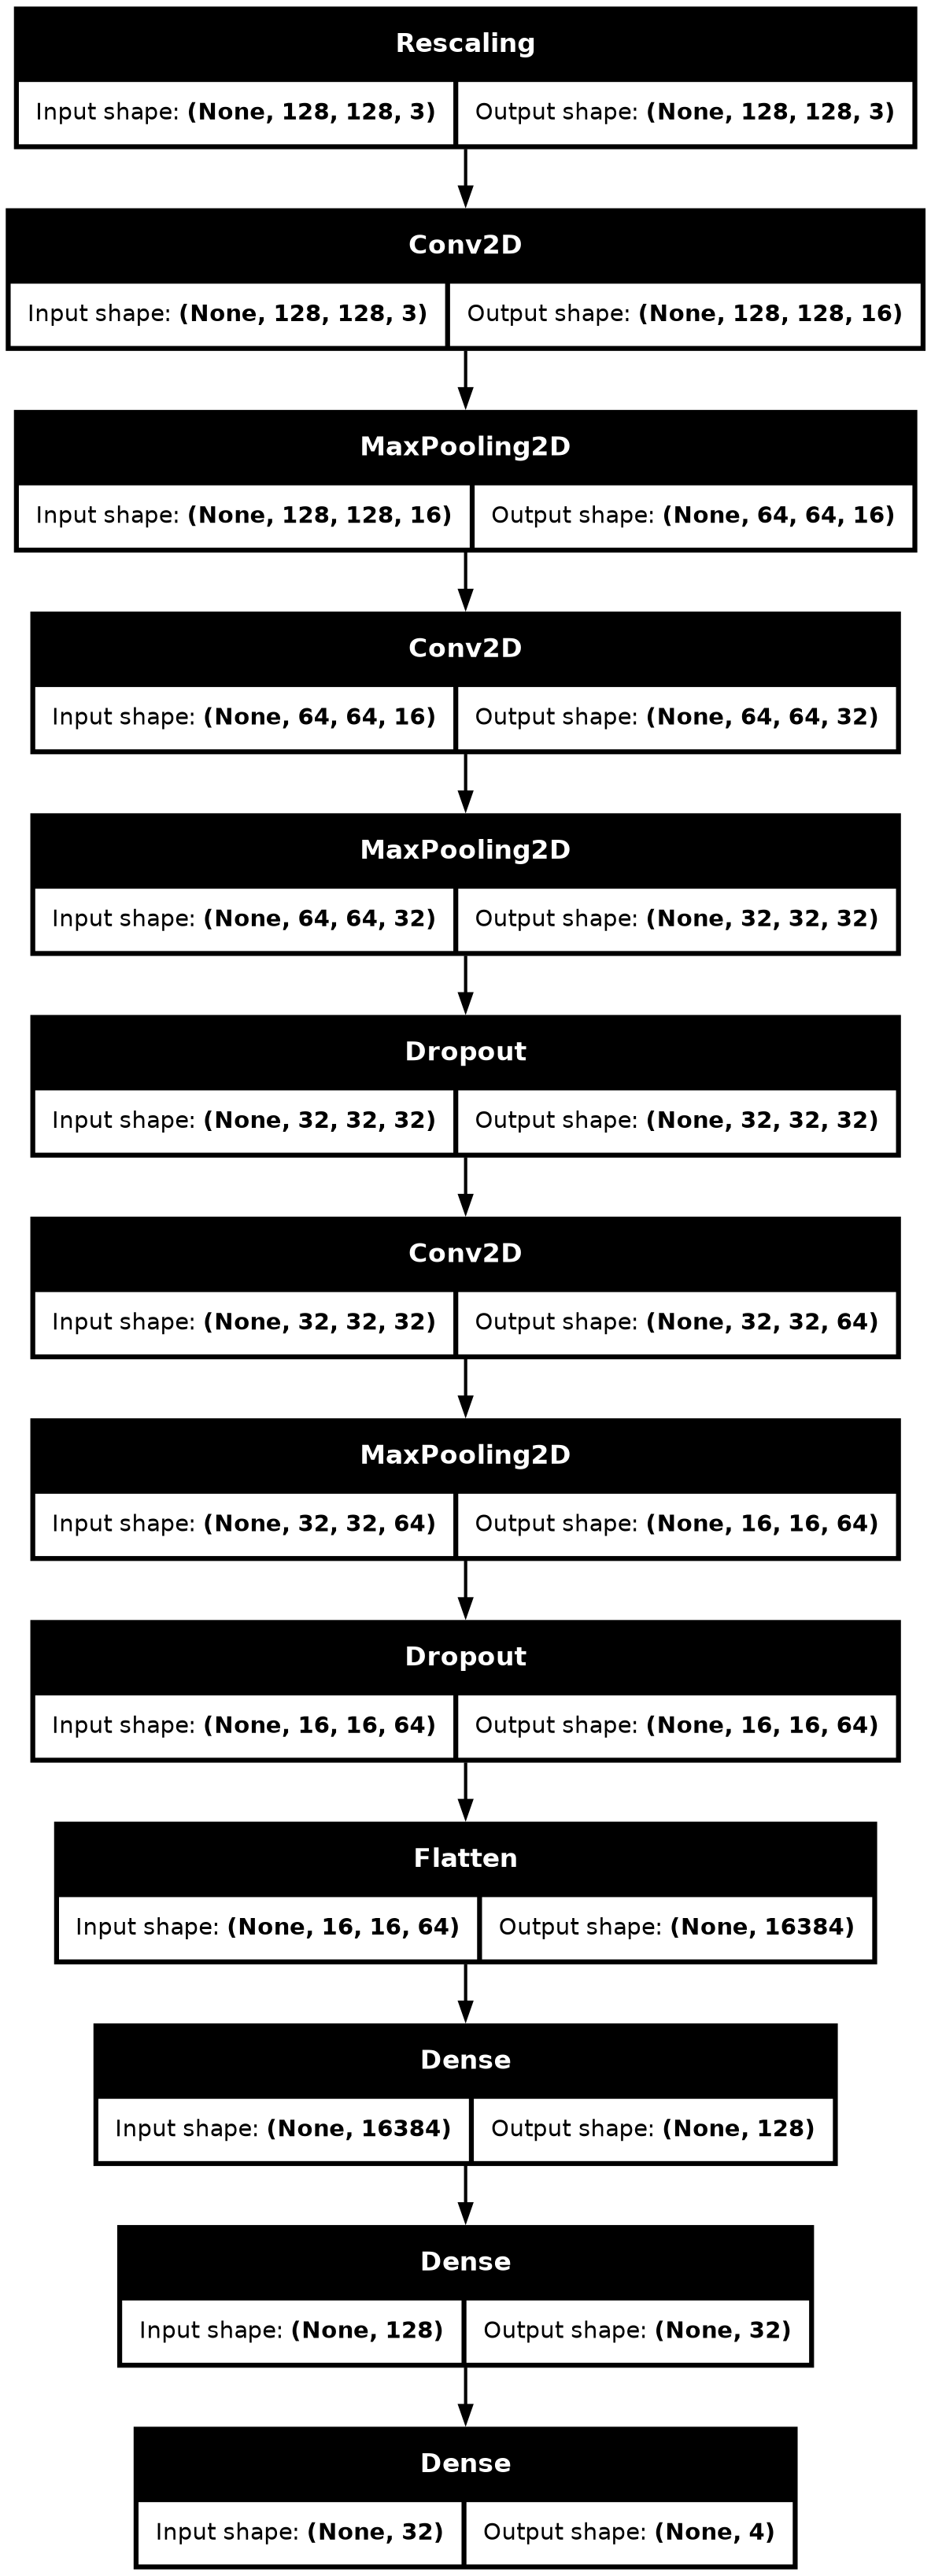

In [20]:
tf.keras.utils.plot_model(model,show_shapes=True,dpi=150)

In [33]:
import tensorflow as tf

# Filepath for saving the best model weights
filepath = './cnn_best_weights.keras'

# Define early stopping and model checkpoint callbacks
earlystopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    mode='max',
    patience=10,
    verbose=1
)

checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    verbose=1
)

# List of callbacks
callbacks_list = [earlystopping, checkpoint]

# Train the model with callbacks
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=validation_generator,
    callbacks=callbacks_list
)


Epoch 1/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 692ms/step - accuracy: 0.5438 - auc_4: 0.8308 - loss: 0.9402 - precision_4: 0.6939 - recall_4: 0.3367
Epoch 1: val_accuracy improved from -inf to 0.57903, saving model to ./cnn_best_weights.keras
80/80 ━━━━━━━━━━━━━━━━━━━━ 64s 735ms/step - accuracy: 0.5438 - auc_4: 0.8309 - loss: 0.9399 - precision_4: 0.6937 - recall_4: 0.3367 - val_accuracy: 0.5790 - val_auc_4: 0.8487 - val_loss: 0.8931 - val_precision_4: 0.7608 - val_recall_4: 0.3036
Epoch 2/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 684ms/step - accuracy: 0.5480 - auc_4: 0.8377 - loss: 0.9066 - precision_4: 0.6936 - recall_4: 0.3370
Epoch 2: val_accuracy did not improve from 0.57903
80/80 ━━━━━━━━━━━━━━━━━━━━ 59s 709ms/step - accuracy: 0.5480 - auc_4: 0.8377 - loss: 0.9067 - precision_4: 0.6937 - recall_4: 0.3369 - val_accuracy: 0.5775 - val_auc_4: 0.8507 - val_loss: 0.9048 - val_precision_4: 0.8278 - val_recall_4: 0.2707
Epoch 3/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 682ms/step - accuracy: 0.5627 - auc_4: 0

In [35]:
result = model.evaluate(test_generator)
train_loss = result[0]
train_accuracy = result[1]
train_AUC = result[2]
train_pre = result[3]
train_rec = result[4]
print(f'Test Loss = {train_loss}')
print(f'Test Accuracy = {train_accuracy}')
print(f'Test AUC = {train_AUC}')
print(f'Test Precision = {train_pre}')
print(f'Test Recall = {train_rec}')

11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 177ms/step - accuracy: 0.8775 - auc_4: 0.9823 - loss: 0.3425 - precision_4: 0.8956 - recall_4: 0.8586
Test Loss = 0.3425959050655365
Test Accuracy = 0.8753893971443176
Test AUC = 0.9827713966369629
Test Precision = 0.895765483379364
Test Recall = 0.8566977977752686


In [38]:
get_ac = history.history['accuracy']
get_los = history.history['loss']
get_pre = history.history['precision_4']
get_rec = history.history['recall_4']
get_auc = history.history['auc_4']

val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

<Figure size 640x480 with 0 Axes>

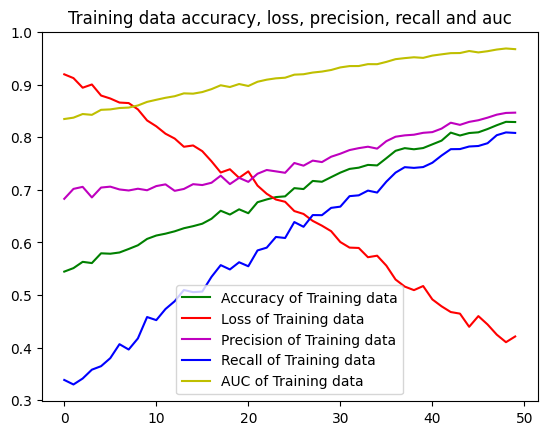

<Figure size 640x480 with 0 Axes>

In [39]:
epochs = range(len(get_ac))
plt.plot(epochs, get_ac, 'g', label='Accuracy of Training data')
plt.plot(epochs, get_los, 'r', label='Loss of Training data')
plt.plot(epochs, get_pre, 'm', label='Precision of Training data')
plt.plot(epochs, get_rec, 'b', label='Recall of Training data')
plt.plot(epochs, get_auc, 'y', label='AUC of Training data')

plt.title('Training data accuracy, loss, precision, recall and auc')
plt.legend(loc=0)
plt.figure()